In [2]:
!pip install opencv-python
!pip install matplotlib

In [4]:
import cv2
import matplotlib.pyplot as plt

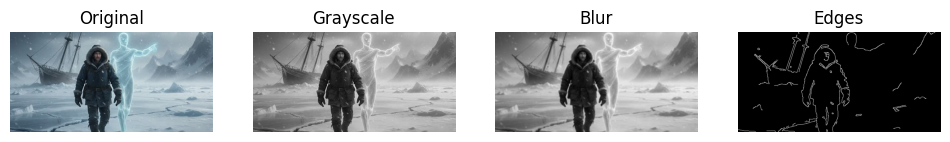

In [6]:
image = cv2.imread("download.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blur, 100, 200)



plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(blur, cmap='gray')
plt.title("Blur")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.axis("off")

plt.show()

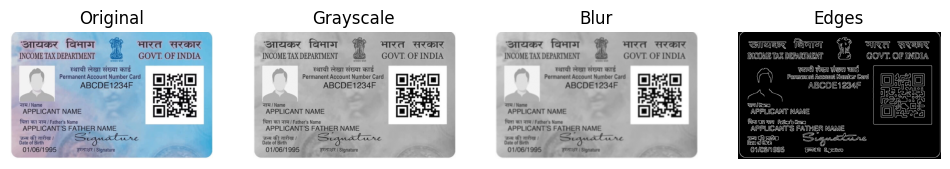

In [7]:
image = cv2.imread("sample-pan-card.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blur, 100, 200)



plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(blur, cmap='gray')
plt.title("Blur")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.axis("off")

plt.show()

In [10]:
!pip install pytesseract

In [11]:
import pytesseract

image = cv2.imread("sample-pan-card.jpg")
extracted_text = pytesseract.image_to_string(image)

print("Extracted Text:")
print(extracted_text)

Extracted Text:
staex faast @f ua war
INCOME TAX DEPARTMENT bi GOVT. OF INDIA

eared Cea BT sas =
Permanent Account Number Card
ABCDE1234F ae
IE;
‘ava / Name ani. —
APPLICANT NAME ol

‘fare a1 ATH / Father's Name
APPLICANT'S FATHER NAME

Sen cht ah | =>

Date of Birth

01/06/1995 FEAT | Signature



In [12]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO


0: 320x640 2 persons, 120.7ms
Speed: 3.8ms preprocess, 120.7ms inference, 19.5ms postprocess per image at shape (1, 3, 320, 640)
Number of humans detected: 2


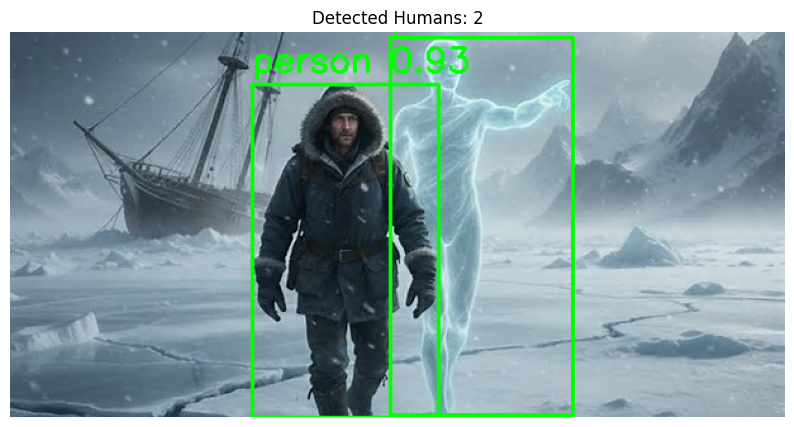

In [14]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO('yolov8n.pt')
image = cv2.imread('download.jpg')
results = model.predict(image, conf=0.5)
names = model.names
human_count = 0
annotated_image = image.copy()

for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])
        if names[cls] == 'person':
            human_count += 1
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            label = f'{names[cls]} {box.conf[0]:.2f}'
            cv2.putText(annotated_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
print(f"Number of humans detected: {human_count}")
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image_rgb)
plt.title(f"Detected Humans: {human_count}")
plt.axis('off')
plt.show()